PROBLEM STATEMENT 1
NATURAL LANGUAGE PROCESSING

In [ ]:
Problem: Implement a function to preprocess and tokenize text data

In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords

# Ensure necessary resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Step 1: Convert text to lowercase
    text = text.lower()

    # Step 2: Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)

    # Step 3: Tokenization
    tokens = nltk.word_tokenize(text)

    # Step 4: Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

    return tokens

# Example usage
sample_text = "Hello World! This is a test sentence. Let's see how it performs..."
processed_tokens = preprocess_text(sample_text)
print(processed_tokens)


##PROBLEM STATEMNET 2

Problem: Create a basic text generation model using a pre-trained transformer (e.g., GPT-3).

In [ ]:
pip install transformers torch

In [ ]:
# Install the required libraries
# !pip install transformers torch

from transformers import GPT2LMHeadModel, GPT2Tokenizer

def generate_text(prompt, max_length=100, model_name='gpt2'):
    # Step 1: Load pre-trained model and tokenizer from Hugging Face
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    model = GPT2LMHeadModel.from_pretrained(model_name)

    # Step 2: Tokenize the input prompt
    input_ids = tokenizer.encode(prompt, return_tensors='pt')

    # Step 3: Generate text using the model
    output = model.generate(input_ids, max_length=max_length, num_return_sequences=1)

    # Step 4: Decode the generated text
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

    return generated_text

# Example usage
prompt = "In a world where AI has become"
generated_text = generate_text(prompt, max_length=50)
print(generated_text)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In a world where AI has become a reality, it's important to understand how it works.

The AI is a machine that can learn to recognize and respond to human actions. It's a machine that can learn to recognize and respond to human


PROBLEM STATEMENT 3:PROMPT ENGINEERING

In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=da2fe9a5d9582f58878818a4e99e0e6ef0b7cee0c7fb2ddbf6e3afa41b3ea4b1
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
from transformers import pipeline
from datasets import load_metric

# Load the model and tokenizer
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Example text input
input_text = " text goes here."

# Generate summaries with different prompts
summaries = {
    "Direct Instruction": summarizer(f"Summarize the following text: {input_text}")[0]['summary_text'],
    "Contextual Instruction": summarizer(f"Given the following article, provide a concise summary highlighting the main points: {input_text}")[0]['summary_text'],
    "Summary Style Instruction": summarizer(f"Generate a brief summary that captures the essence of the following passage: {input_text}")[0]['summary_text'],
    "Summary Focus": summarizer(f"Summarize the key information and eliminate unnecessary details from the following text: {input_text}")[0]['summary_text'],
}

# Load ROUGE metric
rouge = load_metric("rouge")

# Compute ROUGE scores for each summary (against reference summaries)
results = {}
for prompt, summary in summaries.items():
    rouge_score = rouge.compute(predictions=[summary], references=["Your reference summary here"])
    results[prompt] = rouge_score

print(results)


Your max_length is set to 142, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 142, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 142, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 142, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


{'Direct Instruction': {'rouge1': AggregateScore(low=Score(precision=0.0, recall=0.0, fmeasure=0.0), mid=Score(precision=0.0, recall=0.0, fmeasure=0.0), high=Score(precision=0.0, recall=0.0, fmeasure=0.0)), 'rouge2': AggregateScore(low=Score(precision=0.0, recall=0.0, fmeasure=0.0), mid=Score(precision=0.0, recall=0.0, fmeasure=0.0), high=Score(precision=0.0, recall=0.0, fmeasure=0.0)), 'rougeL': AggregateScore(low=Score(precision=0.0, recall=0.0, fmeasure=0.0), mid=Score(precision=0.0, recall=0.0, fmeasure=0.0), high=Score(precision=0.0, recall=0.0, fmeasure=0.0)), 'rougeLsum': AggregateScore(low=Score(precision=0.0, recall=0.0, fmeasure=0.0), mid=Score(precision=0.0, recall=0.0, fmeasure=0.0), high=Score(precision=0.0, recall=0.0, fmeasure=0.0))}, 'Contextual Instruction': {'rouge1': AggregateScore(low=Score(precision=0.0425531914893617, recall=0.5, fmeasure=0.0784313725490196), mid=Score(precision=0.0425531914893617, recall=0.5, fmeasure=0.0784313725490196), high=Score(precision=0.0

  PROBLEM STATEMENT 4 :DATA ANALYSIS

LOADING DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


DATA EXPLORATION AND STATISTICS

In [ ]:
# Descriptive statistics
summary_stats = df.describe()
print(summary_stats)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Distribution of species
species_count = df['species'].value_counts()
print("Species count:\n", species_count)


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Missing values per column:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Species count:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


DATA VISUALIZATION

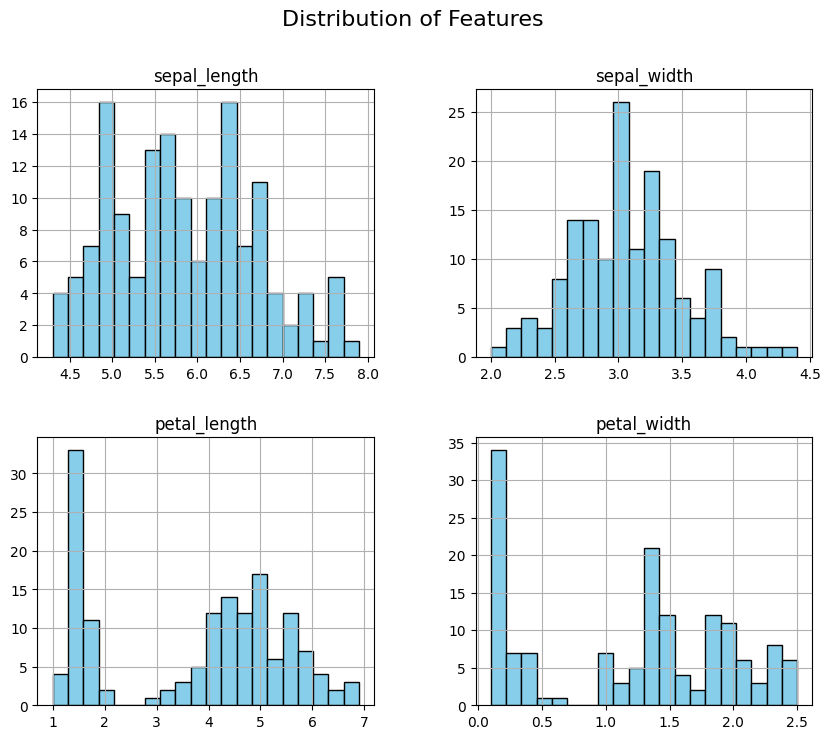

In [ ]:
# Histogram for each feature
df.hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Features', fontsize=16)
plt.show()


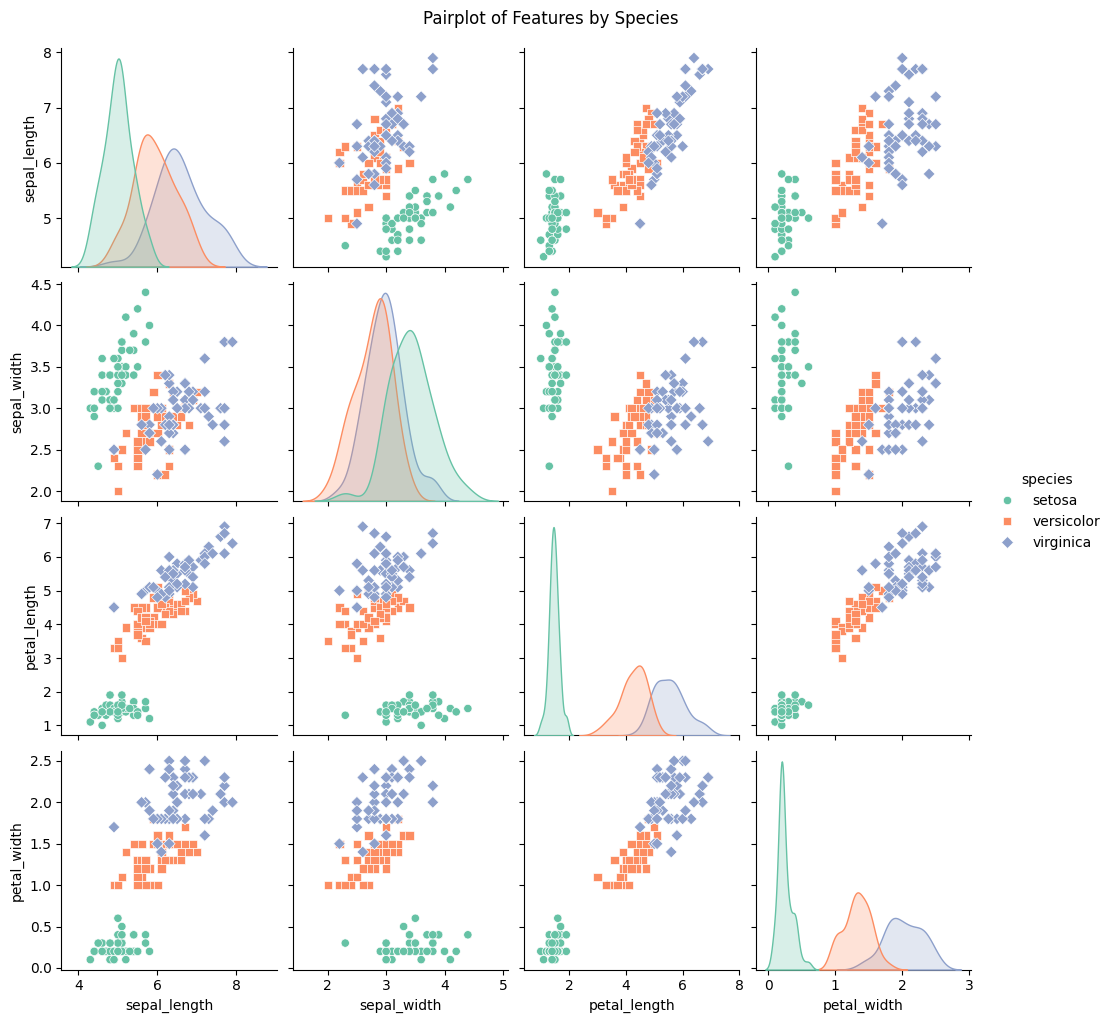

In [ ]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='species', palette='Set2', markers=["o", "s", "D"])
plt.suptitle('Pairplot of Features by Species', y=1.02)
plt.show()


<ipython-input-10-dcd7d80f0049>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal_length', data=df, palette='Set3')


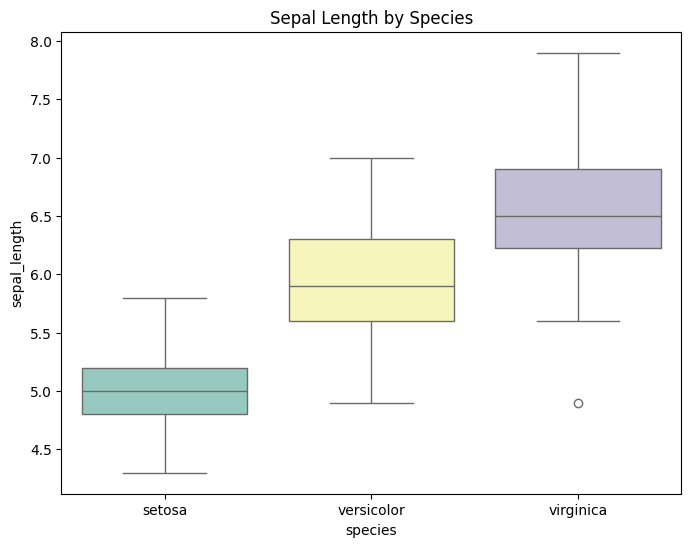

<ipython-input-10-dcd7d80f0049>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal_width', data=df, palette='Set3', ax=axes[0,0])
<ipython-input-10-dcd7d80f0049>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal_length', data=df, palette='Set3', ax=axes[0,1])
<ipython-input-10-dcd7d80f0049>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal_width', data=df, palette='Set3', ax=axes[1,0])


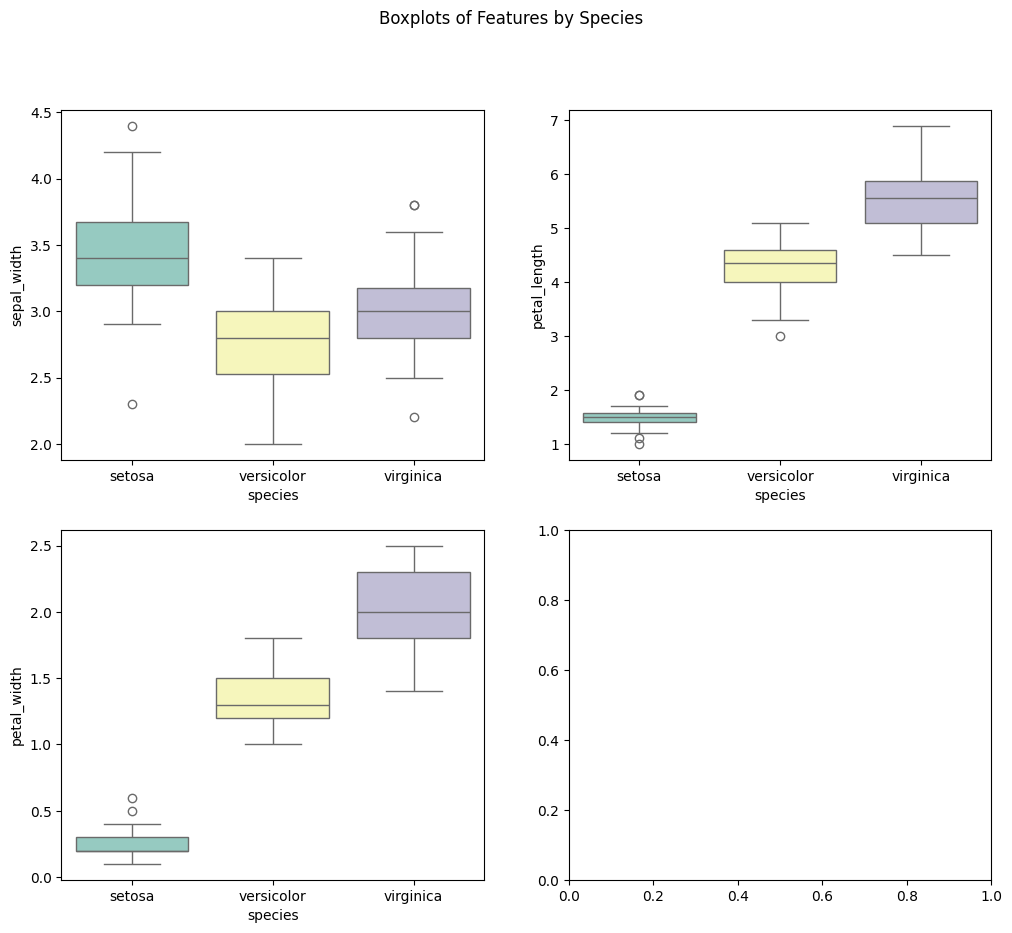

In [ ]:
# Boxplot for Sepal Length by Species
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='sepal_length', data=df, palette='Set3')
plt.title('Sepal Length by Species')
plt.show()

# Boxplot for other features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(x='species', y='sepal_width', data=dfAC, palette='Set3', ax=axes[0,0])
sns.boxplot(x='species', y='petal_length', data=df, palette='Set3', ax=axes[0,1])
sns.boxplot(x='species', y='petal_width', data=df, palette='Set3', ax=axes[1,0])
plt.suptitle('Boxplots of Features by Species')
plt.show()


# Iris Dataset Analysis

## 1. Introduction
This notebook provides an analysis of the Iris dataset using descriptive statistics and visualizations to uncover patterns and insights.

## 2. Data Loading and Exploration
We begin by loading the dataset and performing initial exploratory analysis using descriptive statistics.

## 3. Visualizations
A series of visualizations are used to further explore the relationships between different features and species.

## 4. Insights
Based on the analysis, several key insights are derived that highlight important characteristics of the Iris species.

## 5. Conclusion
The analysis successfully identifies patterns within the dataset, which can be leveraged for tasks such as species classification.


PROBLEM STATMENT:5  LIVE CODING SEASION -API INTEGRATION

In [ ]:
import requests

# Your API key (replace with actual API key)
api_key = "api_key_here"

# Base URL for the OpenWeatherMap API
base_url = "http://api.openweathermap.org/data/2.5/weather"


In [ ]:
def get_weather_data(city_name):
    # Construct the complete API endpoint
    complete_url = f"{base_url}?q={city_name}&appid={api_key}&units=metric"

    try:
        # Make the API request
        response = requests.get(complete_url)

        # Check if the response was successful
        if response.status_code == 200:
            # Parse the JSON response
            data = response.json()

            # Extract relevant information
            main = data['main']
            weather = data['weather'][0]
            wind = data['wind']

            # Format the output
            result = {
                "City": data['name'],
                "Temperature": f"{main['temp']}°C",
                "Pressure": f"{main['pressure']} hPa",
                "Humidity": f"{main['humidity']}%",
                "Weather": weather['description'].capitalize(),
                "Wind Speed": f"{wind['speed']} m/s"
            }

            # Display the result in a user-friendly format
            print("\nWeather Information:")
            for key, value in result.items():
                print(f"{key}: {value}")

        elif response.status_code == 404:
            print("City not found. Please enter a valid city name.")

        else:
            print(f"Error: Unable to fetch data (Status Code: {response.status_code})")

    except requests.exceptions.RequestException as e:
        # Handle any requests-related errors (e.g., network issues)
        print(f"An error occurred: {e}")

# User input for the city name
city_name = input("Enter city name: ")
get_weather_data(city_name)
